# EDA for G2M insight for Cab Investment firm

In [34]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

### Reading the contents of a CSV files and checking them

In [35]:
transaction_id = pd.read_csv('Transaction_ID.csv')
customer_id = pd.read_csv('Customer_ID.csv')
city_data = pd.read_csv('City.csv')
cab_data = pd.read_csv('Cab_Data.csv')

In [36]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [37]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [38]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [39]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [40]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [41]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [42]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [43]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


### Working with the data

##### Transforming data to an usefull type to analyze

In [44]:
city_data['Population'] = city_data['Population'].str.replace(',', '').astype(int)
city_data['Users'] = city_data['Users'].str.replace(',', '').astype(int)

In [45]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-29', unit='D')
cab_data = cab_data.astype({'Company': 'string', 'City': 'string'})

##### Merging all related data to create one master data.

In [46]:
transaction_cab_merged = pd.merge(transaction_id, cab_data, on='Transaction ID', how='inner')

In [47]:
master_data = pd.merge(transaction_cab_merged, customer_id, on='Customer ID', how='inner')

In [48]:
master_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813
1,10351127,29290,Cash,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
2,10412921,29290,Card,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
3,10000012,27703,Card,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237
4,10320494,27703,Card,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237


In [49]:
master_data.to_csv("master_data.csv")

### Setting some defaults, calculating net profit and adding the convert to millions and calculate retantion rate function

In [50]:
company_colors = {"Pink Cab": "pink", "Yellow Cab": "yellow"}
sns.set(rc={'figure.figsize':(10, 6)})
sns.set_style('dark')

In [51]:
master_data['Net Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

In [52]:
def convert_to_millions(x, pos):
    return f'{x * 1e-6:.1f}M'

In [53]:
def customer_retention_rate(database, year, company):
    previous_year = set(database[(database['Year'] == year-1) & (database['Company'] == company)]['Customer ID'])
    current_year = set(database[(database['Year'] == year) & (database['Company'] == company)]['Customer ID'])
    returning_customers = current_year.intersection(previous_year)
    customer_retention_rate = len(returning_customers) / len(previous_year) if previous_year else 0
    return customer_retention_rate

### Analysis 0 - Cab industiry users per city

Text(0.5, 1.0, 'Total cab usage by cities')

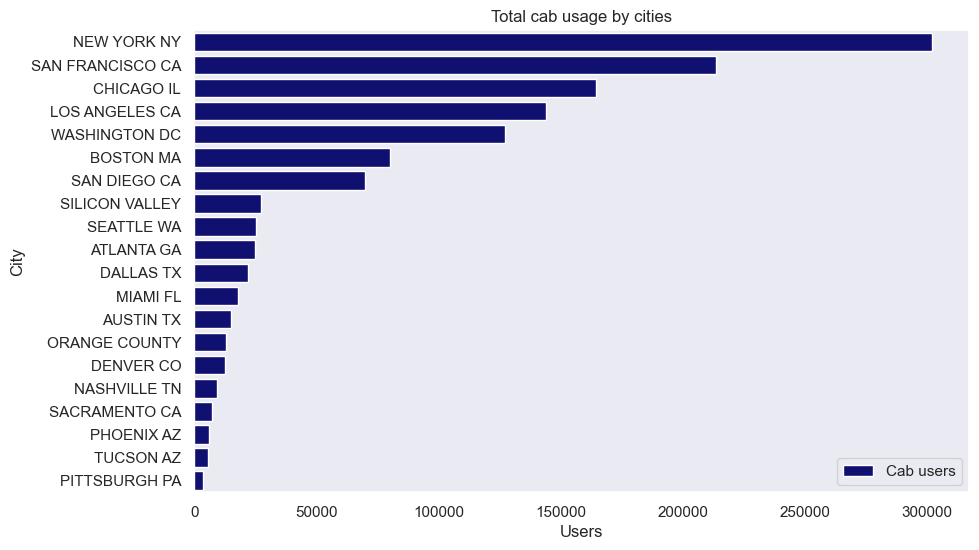

In [54]:
sorted_city_data = city_data.sort_values('Users', ascending=False)
sns.barplot(data=sorted_city_data, x='Users', y='City', label='Cab users', color='navy').set_title('Total cab usage by cities')

### Analysis 1 - Analyzing user base of the companies

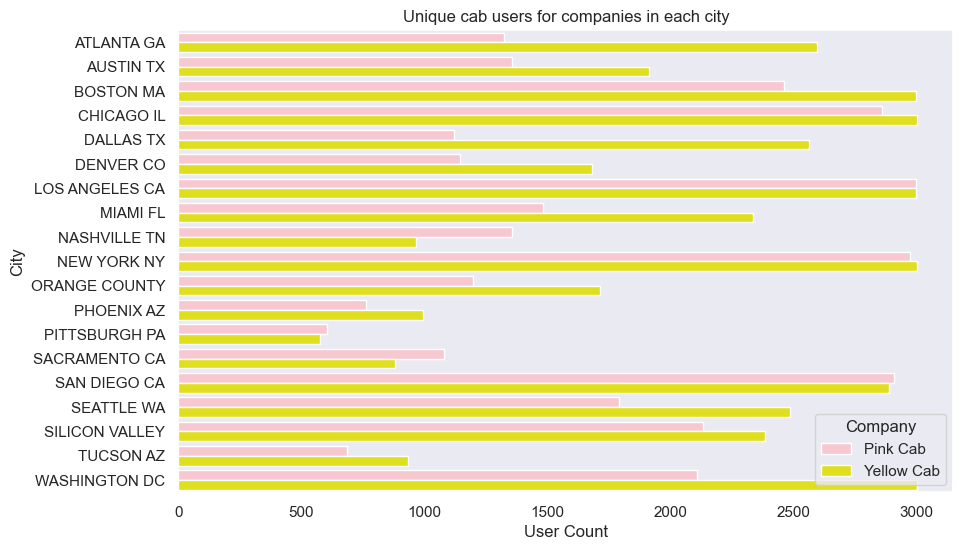

In [55]:
users_company_city = master_data.groupby(['Company', 'City'])['Customer ID'].nunique().reset_index()
users_company_city.rename(columns={'Customer ID': 'User Count'}, inplace=True)
customers_comapny_city = sns.barplot(data=users_company_city, y='City', x='User Count', hue='Company', palette=company_colors).set_title('Unique cab users for companies in each city')

[Text(0.5, 0, 'Company'),
 Text(0, 0.5, 'Unique Users'),
 Text(0.5, 1.0, 'Gender Distribution by Company')]

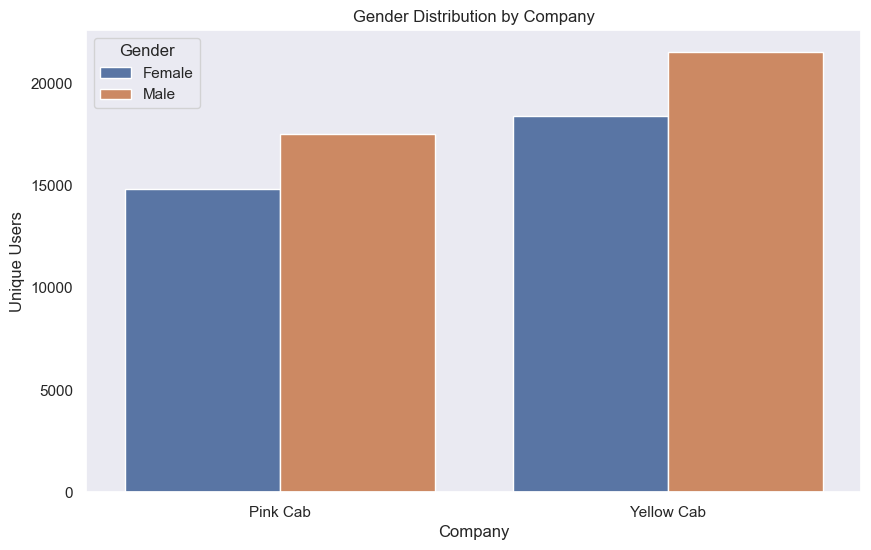

In [56]:
gender_distribution = master_data.groupby(['Company', 'Gender'])['Customer ID'].nunique().reset_index(name='Count')
gender_by_company = sns.barplot(data=gender_distribution, x='Company', y='Count', hue='Gender')
gender_by_company.set(xlabel='Company', ylabel='Unique Users', title='Gender Distribution by Company')

### Analysis 2 - Finding where most of the income for the companies comes

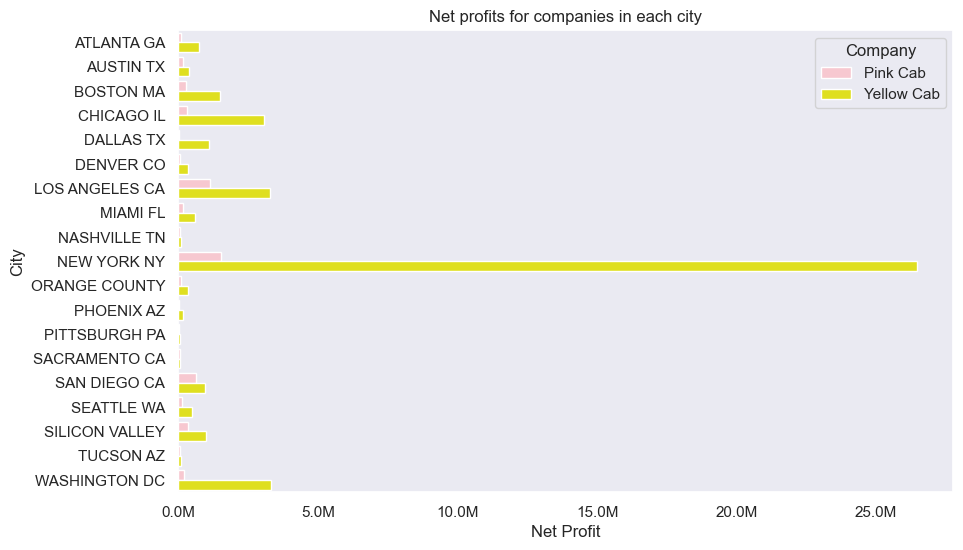

In [57]:
net_profit_by_company_city = master_data.groupby(['Company', 'City'])['Net Profit'].sum().reset_index()
each_city_net_data = sns.barplot(data=net_profit_by_company_city, y='City', x='Net Profit', hue='Company', palette=company_colors)
each_city_net_data.set(xlabel='Net Profit', ylabel='City', title='Net profits for companies in each city')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(convert_to_millions))

[Text(0.5, 0, 'Users'),
 Text(0, 0.5, 'City'),
 Text(0.5, 1.0, 'Times companies are used in each city')]

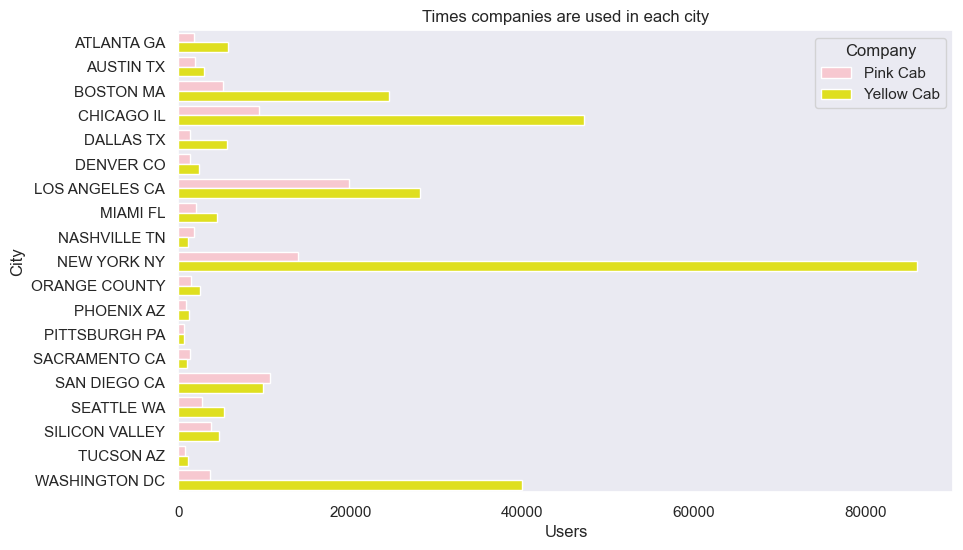

In [58]:
company_city = sns.countplot(data=master_data, y='City', hue='Company', palette=company_colors)
company_city.set(xlabel='Users', ylabel='City', title='Times companies are used in each city')

### Analysis 3 - Rention rates of the companies

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Retention rate'),
 Text(0.5, 1.0, 'Yearly retention rate for each company')]

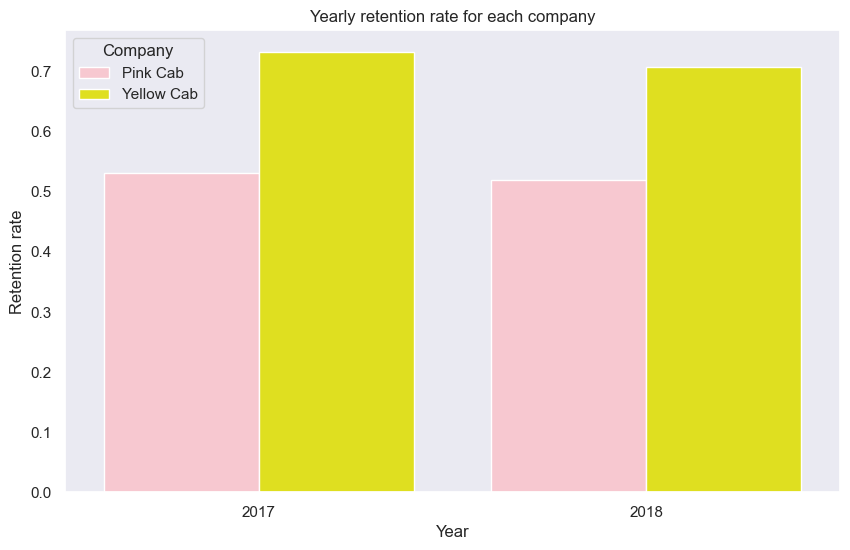

In [59]:
master_data['Year'] = master_data['Date of Travel'].dt.year
companies = master_data['Company'].unique()
years = master_data['Year'].unique()

retention_rate_data = []
for company in companies:
    for year in years:
        retention_rate = customer_retention_rate(master_data, year, company)
        retention_rate_data.append({'Company': company, 'Year': year, 'Retention Rate': retention_rate})

retention_data = pd.DataFrame(retention_rate_data)
retention_data = retention_data[retention_data['Year'] > retention_data['Year'].min()]

retention_plot = sns.barplot(data=retention_data, x='Year', y='Retention Rate', hue='Company', palette=company_colors)
retention_plot.set(xlabel='Year', ylabel='Retention rate', title='Yearly retention rate for each company')

### Analysis 4 - Net profits for the companies

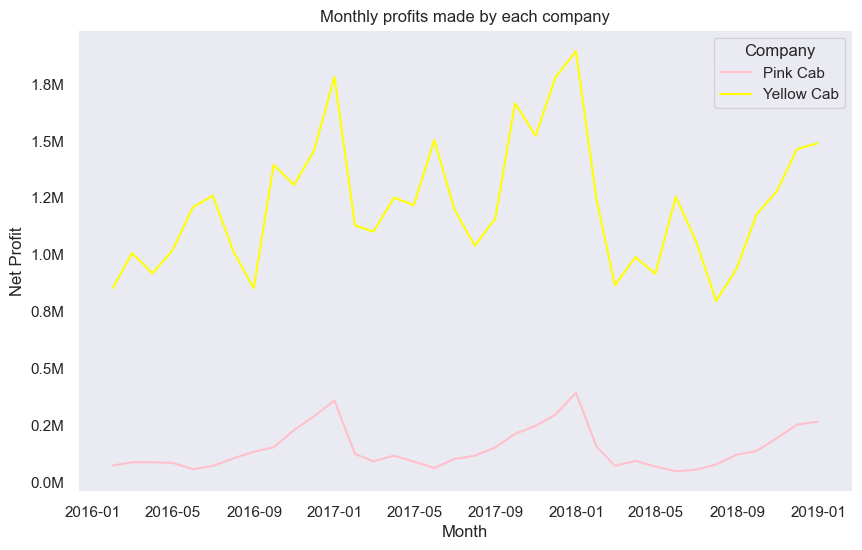

In [60]:
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'])
master_data.set_index('Date of Travel', inplace=True)
monthly_profit = master_data.groupby('Company').resample('M')['Net Profit'].sum().reset_index()
monthly_profit_plot = sns.lineplot(data=monthly_profit, x='Date of Travel', y='Net Profit', hue='Company', palette=company_colors)
monthly_profit_plot.set(xlabel='Month', ylabel='Net Profit', title='Monthly profits made by each company')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(convert_to_millions))

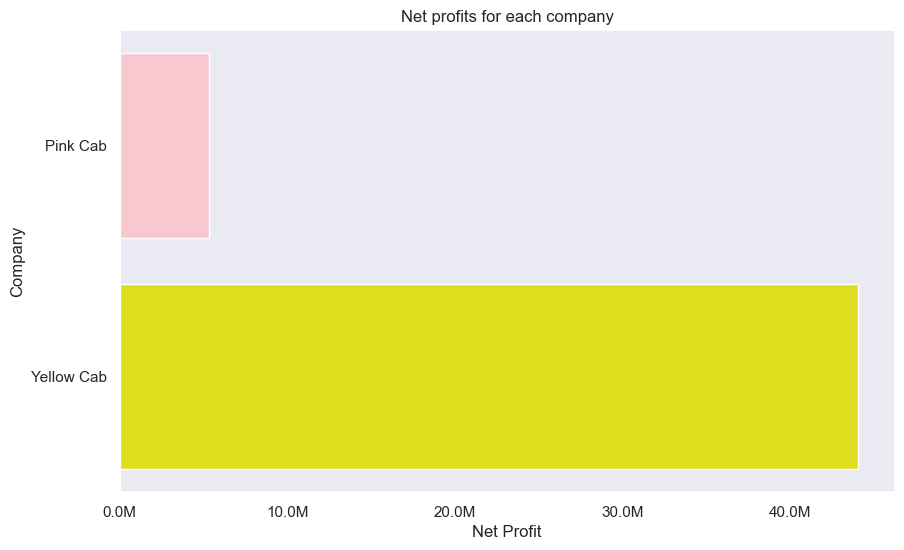

In [61]:
total_net_profit_by_company = master_data.groupby(['Company'])['Net Profit'].sum().reset_index()
company_net_data = sns.barplot(y='Company', x='Net Profit', hue='Company', data=total_net_profit_by_company, palette=company_colors)
company_net_data.set(xlabel='Net Profit', ylabel='Company', title='Net profits for each company')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(convert_to_millions))

### Analysis 5 - Future proof ability

[Text(0.5, 0, 'Company'),
 Text(0, 0.5, 'Number of Transactions'),
 Text(0.5, 1.0, 'Payment Method Usage by Company')]

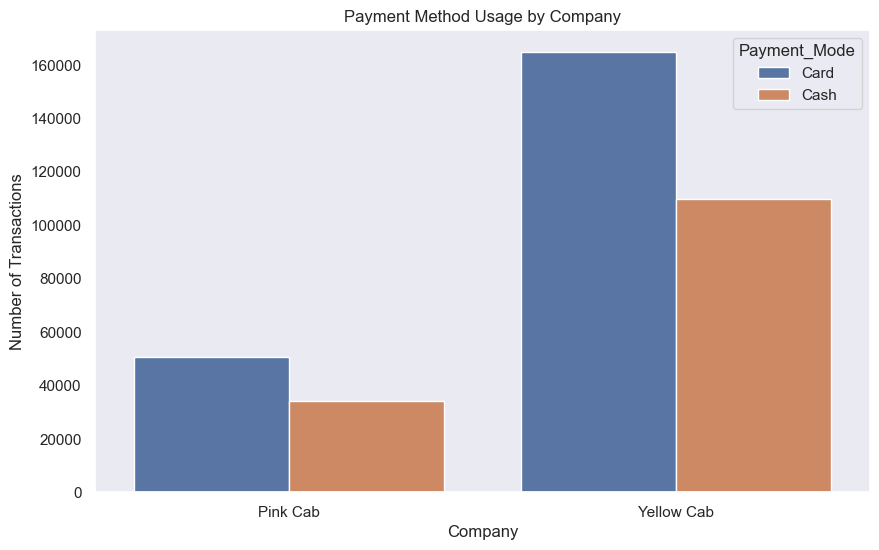

In [62]:
payment_distribution = master_data.groupby(['Company', 'Payment_Mode']).size().unstack()
payment_methods = sns.barplot(data=payment_distribution.reset_index().melt(id_vars='Company'), x='Company', y='value', hue='Payment_Mode')
payment_methods.set(xlabel='Company', ylabel='Number of Transactions', title='Payment Method Usage by Company')

### EDA Analysis
##### Since the data provided covers the period between 31/01/2016 and 31/12/2018, it can't be considered a reliable source for making a business decision in 2023. However, even though the unique customer counts are the same for both companies, we can see from the data sets provided that Yellow Cab users used their service more, which resulted in higher profits for the Yellow Cab company. Also, Yellow Cab managed to keep a higher customer retention rate than its competitor, Pink Cab. Yellow Cab has the upper hand regarding future-proof ability since customers use Credit cards to pay more. They can implement more technologies into their company, like a mobile app to call cabs and pay for the services using the app.

### Conclusion
##### Overall, according to data provided and analyzed, Yellow Cab is a better business opportunity than its competitor because of its royal user base, higher profits, and future-proofing.